In [1]:
%matplotlib inline

In [2]:
from time import time
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')
y_train = y_raw[0:3900]
y_test = y_raw[4875:6500]

print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


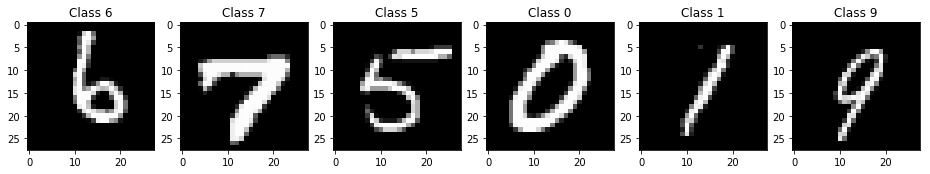

In [4]:
num_figures = 6
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

In [5]:
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


In [6]:
n_neighbors = 1
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train.reshape(-1,28*28), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
t0 = time()
predictions = clf.predict(X_test.reshape(-1,28*28))
print('Time elapsed: %.2fs' % (time()-t0))

Time elapsed: 6.47s


In [11]:
print('Predicted', len(predictions), 'digits with accuracy:', accuracy_score(y_test, predictions))

Predicted 1625 digits with accuracy: 0.9403076923076923


In [12]:
correct_indices = np.nonzero(predictions == y_test)[0]
incorrect_indices = np.nonzero(predictions != y_test)[0]

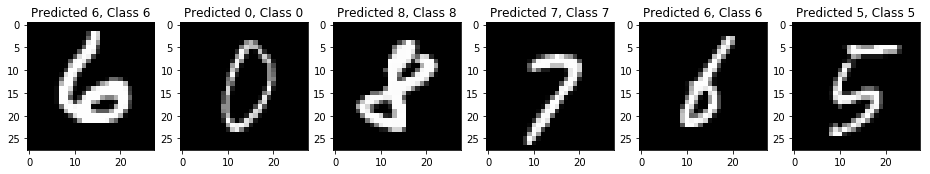

In [13]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[correct], y_test[correct]))

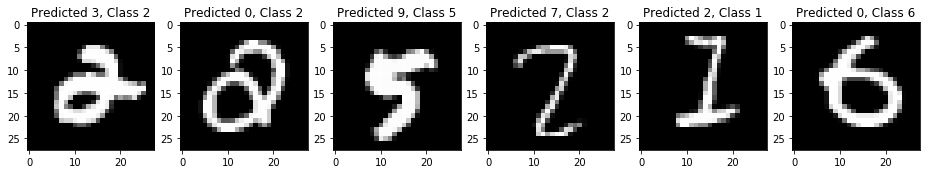

In [14]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[incorrect], y_test[incorrect]))